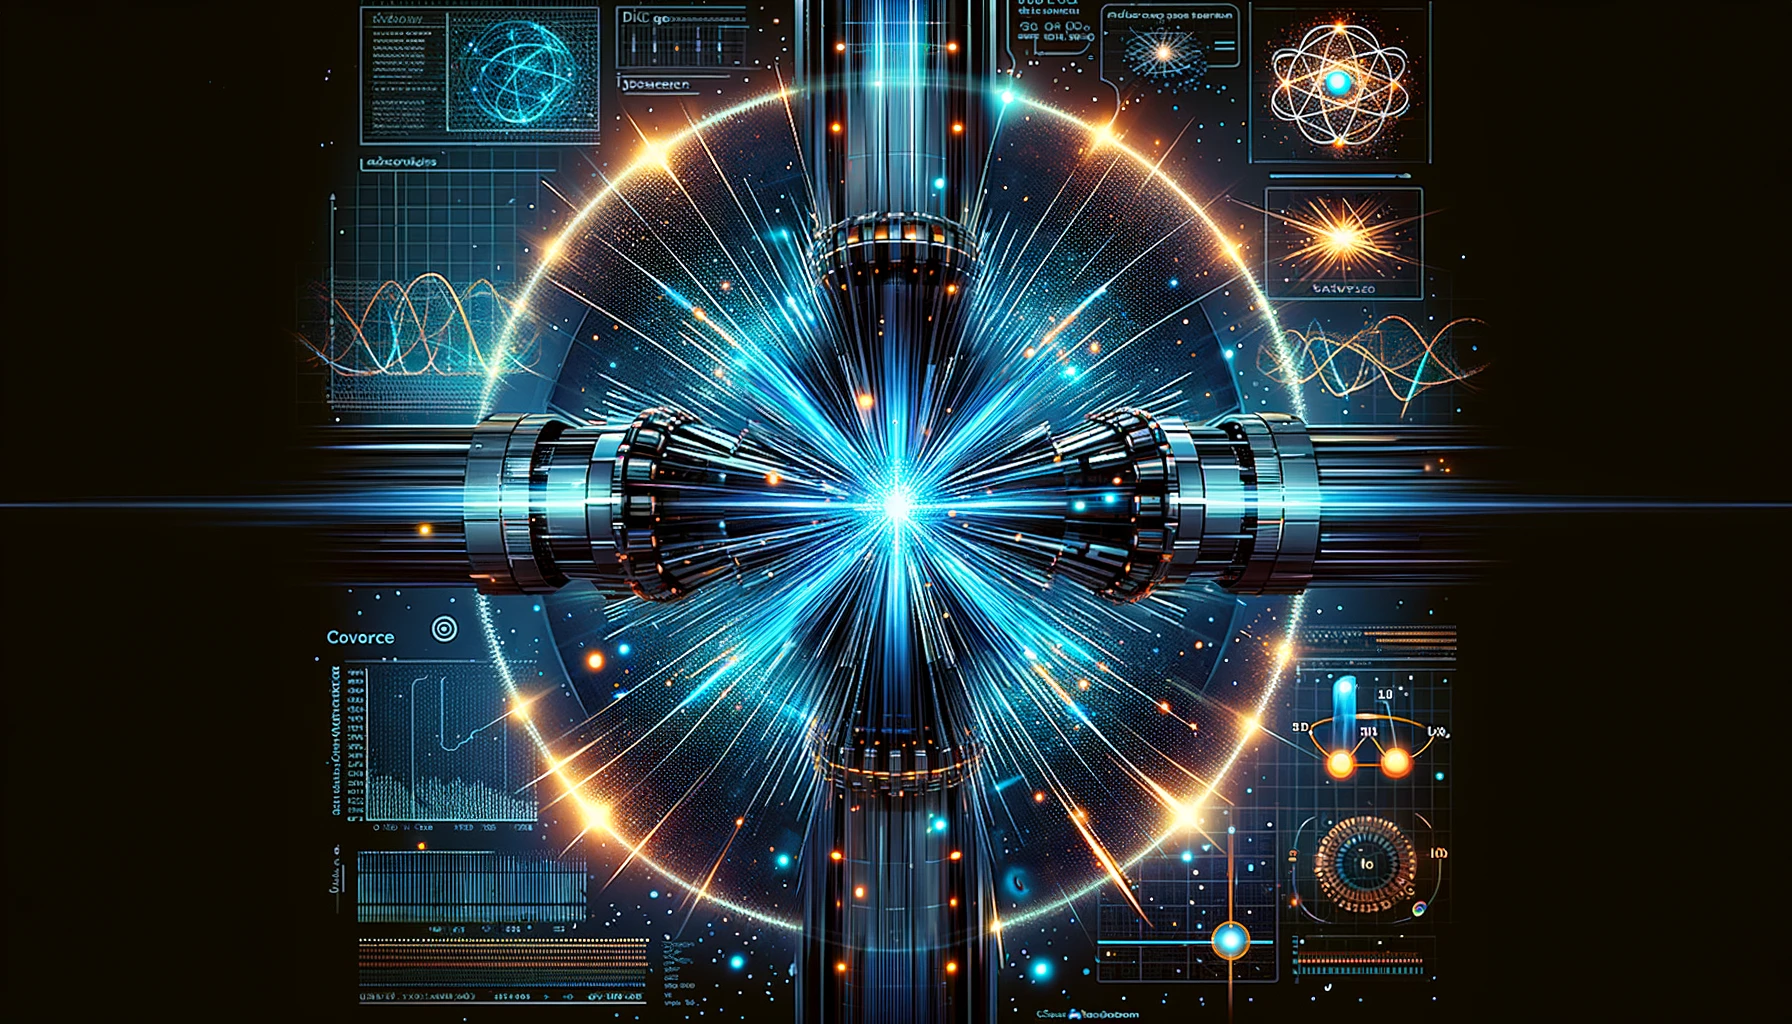

# Problem Statement

The goal of this project is to develop a machine learning model capable of accurately classifying particle collision events as either **signal (s)** or **background (b)** in the search for the Higgs boson, a fundamental particle in the Standard Model of particle physics. In the dataset, signal events represent occurrences potentially involving the Higgs boson, while background events represent noise or other non-relevant processes. The challenge is to differentiate between these two types of events based on various measured and derived features from high-energy particle collisions, simulating data collected from experiments like those performed at the **Large Hadron Collider (LHC)**.

# Objectives

1. **Understand and Preprocess the Dataset**:
   - Analyze the dataset to identify key features and understand the importance of derived and primary features.
   - Handle missing or irrelevant data (e.g., placeholders like `-999.000`).
   - Normalize or standardize the data for use in machine learning models.

2. **Select and Engineer Features**:
   - Select the most relevant features based on domain knowledge (such as jet momenta, pseudorapidity, and missing transverse energy).
   - Explore dimensionality reduction or feature selection techniques to improve model performance and reduce computational costs.

3. **Build Classification Models**:
   - Train and test various machine learning models (such as Logistic Regression, Decision Trees, Random Forests, Gradient Boosting Machines, or Neural Networks) to classify events as either signal or background.
   - Optimize the models using techniques such as hyperparameter tuning to maximize performance.
   
4. **Evaluate Model Performance**:
   - Assess the models using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
   - Compare the performance of different models and select the best one for making predictions on unseen data.

5. **Predict Event Classifications**:
   - Use the trained model to predict whether future particle events are signal or background.
   - Develop insights into which features are most influential in determining the class of an event.

# Approach

1. **Data Exploration and Cleaning**:
   - Begin with loading and inspecting the dataset, identifying key features, and detecting any missing or placeholder values (`-999.000`).
   - Perform data cleaning by replacing or handling missing values, such as imputation or discarding features that are less relevant.
   - Normalize continuous variables, ensuring that they are on a consistent scale.

2. **Feature Selection and Engineering**:
   - Use statistical methods and domain knowledge to select meaningful features from both primary and derived features.
   - Optionally apply dimensionality reduction techniques like Principal Component Analysis (PCA) to reduce redundancy in the data.
   - Explore feature importance scores from models like Random Forests to further refine the selection.

3. **Modeling**:
   - Split the data into training and validation sets for model development.
   - Train multiple classification models including:
     - Logistic Regression
     - Decision Trees
     - Random Forests
     - Gradient Boosting Machines (e.g., XGBoost or LightGBM)
     - Support Vector Machines (SVM)
     - Neural Networks
   - Use cross-validation to ensure the models generalize well and prevent overfitting.
   - Tune hyperparameters using grid search or random search techniques.

4. **Model Evaluation**:
   - Evaluate each model based on accuracy, precision, recall, F1-score, and ROC-AUC.
   - Visualize performance through confusion matrices, ROC curves, and feature importance plots.
   - Identify the model with the highest performance on the validation set.

5. **Final Model and Predictions**:
   - Select the best-performing model and retrain it on the full training set.
   - Make final predictions on the test dataset or unseen data.
   - Optionally, interpret the results by analyzing the most influential features and how they relate to the classification.

# Importing Initial Necessary Libraries

In [34]:
import pandas as pd
import numpy as np
import gdown
np.random.seed(0)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Load the Dataset

In [2]:
url = '1sD2ftclhkF8_5O0F6ZtdCQGp6dWramWT'
out = 'Higgs-Boson Dataset'
gdown.download_folder(id=url, output=out, quiet=False)

Retrieving folder contents


Retrieving folder 1uR6TuX0IcNt2y1RbVAh13i4FWRa3-rFZ test
Processing file 1SdS4Ef37dZyJqUuONPgil0iURiO_4PgT test.csv
Retrieving folder 15ZCVFFBJ7Yql-nkPqwzGoGDkmt2aHw-C training
Processing file 1rDdSsvGUxWvMTOnnYhRs55mewMFHfQxh training.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1SdS4Ef37dZyJqUuONPgil0iURiO_4PgT
From (redirected): https://drive.google.com/uc?id=1SdS4Ef37dZyJqUuONPgil0iURiO_4PgT&confirm=t&uuid=7b2fcc75-9f39-4bdd-ab62-6cd593530b75
To: /content/Higgs-Boson Dataset/test/test.csv
100%|██████████| 112M/112M [00:01<00:00, 59.7MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1rDdSsvGUxWvMTOnnYhRs55mewMFHfQxh
To: /content/Higgs-Boson Dataset/training/training.csv
100%|██████████| 55.3M/55.3M [00:00<00:00, 58.6MB/s]
Download completed


['Higgs-Boson Dataset/test/test.csv',
 'Higgs-Boson Dataset/training/training.csv']

In [3]:
df = pd.read_csv('/content/Higgs-Boson Dataset/training/training.csv')
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


## Description of the Variables

Here’s a detailed description of the columns from the "Higgs Boson Event" dataset:

***Primary Columns (Direct Measurements)***

1. **PRI_jet_num**: The number of jets (hadronic substructure) detected in the event.
2. **PRI_jet_leading_pt**: Transverse momentum (\(p_T\)) of the leading (highest \(p_T\)) jet in the event.
3. **PRI_jet_leading_eta**: Pseudorapidity of the leading jet, measuring its angle relative to the beam axis.
4. **PRI_jet_leading_phi**: Azimuthal angle (in the transverse plane) of the leading jet.
5. **PRI_jet_subleading_pt**: Transverse momentum of the subleading (second-highest \(p_T\)) jet.
6. **PRI_jet_subleading_eta**: Pseudorapidity of the subleading jet.
7. **PRI_jet_subleading_phi**: Azimuthal angle of the subleading jet.
8. **PRI_jet_all_pt**: Scalar sum of the transverse momenta of all detected jets.
9. **PRI_tau_pt**: Transverse momentum of the tau particle.
10. **PRI_tau_eta**: Pseudorapidity of the tau particle.
11. **PRI_tau_phi**: Azimuthal angle of the tau particle.
12. **PRI_lep_pt**: Transverse momentum of the lepton (muon or electron).
13. **PRI_lep_eta**: Pseudorapidity of the lepton.
14. **PRI_lep_phi**: Azimuthal angle of the lepton.
15. **PRI_met**: Magnitude of the missing transverse energy (MET), often due to neutrinos escaping detection.
16. **PRI_met_phi**: Azimuthal angle of the missing transverse energy.
17. **PRI_met_sumet**: Scalar sum of the transverse energy in the detector, used to measure the overall energy detected.

***Derived Columns (Calculated or Inferred from Primary Measurements)***

1. **DER_mass_MMC**: Reconstructed invariant mass, using the Missing Mass Calculator (MMC). This aims to approximate the mass of the event, which is crucial in Higgs boson detection.
2. **DER_mass_transverse_met_lep**: Transverse mass calculated between the missing transverse energy (MET) and the lepton.
3. **DER_mass_vis**: The visible mass of the system, calculated using only the tau and the lepton.
4. **DER_pt_h**: The transverse momentum of the Higgs boson candidate.
5. **DER_deltaeta_jet_jet**: Difference in pseudorapidity between the two leading jets.
6. **DER_mass_jet_jet**: Invariant mass of the two leading jets, often used to detect the presence of Higgs boson decays.
7. **DER_prodeta_jet_jet**: Product of pseudorapidities of the two leading jets.
8. **DER_deltar_tau_lep**: Delta R between the tau and lepton, a measure of the angular separation.
9. **DER_pt_tot**: Total transverse momentum of the system, including all particles.
10. **DER_sum_pt**: Sum of the transverse momenta of all detectable particles.
11. **DER_pt_ratio_lep_tau**: Ratio of transverse momentum between the lepton and tau particle.
12. **DER_met_phi_centrality**: Centrality of the MET, measuring its alignment with other objects in the event.
13. **DER_lep_eta_centrality**: Centrality of the lepton in relation to the jets.

***Other Columns***

1. **EventId**: Unique identifier for each event, used for reference.
2. **Weight**: Weight assigned to each event, used in the training process to give importance to some events over others (higher weight = more importance).
3. **Label**: The classification of the event, where:
   - `s` stands for signal (potential Higgs boson event).
   - `b` stands for background (non-signal event or noise).

***Special Values***

- **-999.000**: This value is used as a placeholder for missing or irrelevant data (e.g., when an event does not involve jets, many jet-related variables are set to this value).

The dataset contains both raw measurements and features derived from those measurements. It aims to help build models that predict whether an event is a signal (possibly involving the Higgs boson) or just background noise.

## Basic Checks

In [4]:
df.shape

(250000, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EventId,250000.0,224999.500000,72168.927986,100000.000000,162499.750000,224999.500000,287499.250000,349999.000000
DER_mass_MMC,250000.0,-49.023079,406.345647,-999.000000,78.100750,105.012000,130.606250,1192.026000
DER_mass_transverse_met_lep,250000.0,49.239819,35.344886,0.000000,19.241000,46.524000,73.598000,690.075000
DER_mass_vis,250000.0,81.181982,40.828691,6.329000,59.388750,73.752000,92.259000,1349.351000
DER_pt_h,250000.0,57.895962,63.655682,0.000000,14.068750,38.467500,79.169000,2834.999000
DER_deltaeta_jet_jet,250000.0,-708.420675,454.480565,-999.000000,-999.000000,-999.000000,0.490000,8.503000
DER_mass_jet_jet,250000.0,-601.237051,657.972302,-999.000000,-999.000000,-999.000000,83.446000,4974.979000
DER_prodeta_jet_jet,250000.0,-709.356603,453.019877,-999.000000,-999.000000,-999.000000,-4.593000,16.690000
DER_deltar_tau_lep,250000.0,2.373100,0.782911,0.208000,1.810000,2.491500,2.961000,5.684000
DER_pt_tot,250000.0,18.917332,22.273494,0.000000,2.841000,12.315500,27.591000,2834.999000


### Dropping the `EventID`

In [7]:
df.drop(columns=["EventId"], axis=1, inplace=True)
df.shape

(250000, 32)

# Basic EDAs

## `Label` Distribution

In [8]:
df["Label"].value_counts()

,count
Label,
b,164333
s,85667


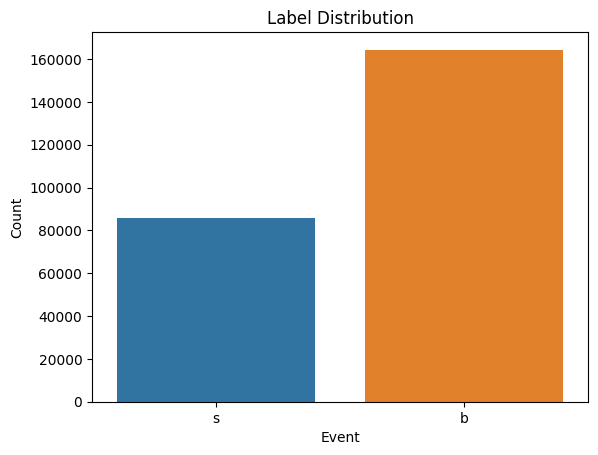

In [13]:
plt.title("Label Distribution")
sns.countplot(x=df["Label"], data=df, hue=df['Label'])
plt.xlabel("Event")
plt.ylabel("Count")
plt.show()

This plot represents the **distribution of event labels** (signal and background) in the dataset. It is a bar chart with the following key details:

- **X-axis (Event)**: It shows two categories: `s` for signal events and `b` for background events.
- **Y-axis (Count)**: It represents the number of occurrences for each type of event in the dataset.

***Insights***
- There are significantly more background events (`b`) than signal events (`s`).
- The signal events (`s`) have a lower count, indicating an **imbalance** in the dataset, which is common in classification problems involving rare phenomena like Higgs boson detection.
  
This class imbalance can affect the performance of machine learning models, as they might become biased towards predicting the majority class (background events). To address this, techniques such as **oversampling** the minority class (`s`), **undersampling** the majority class (`b`), or using specialized algorithms that handle class imbalance can be used.

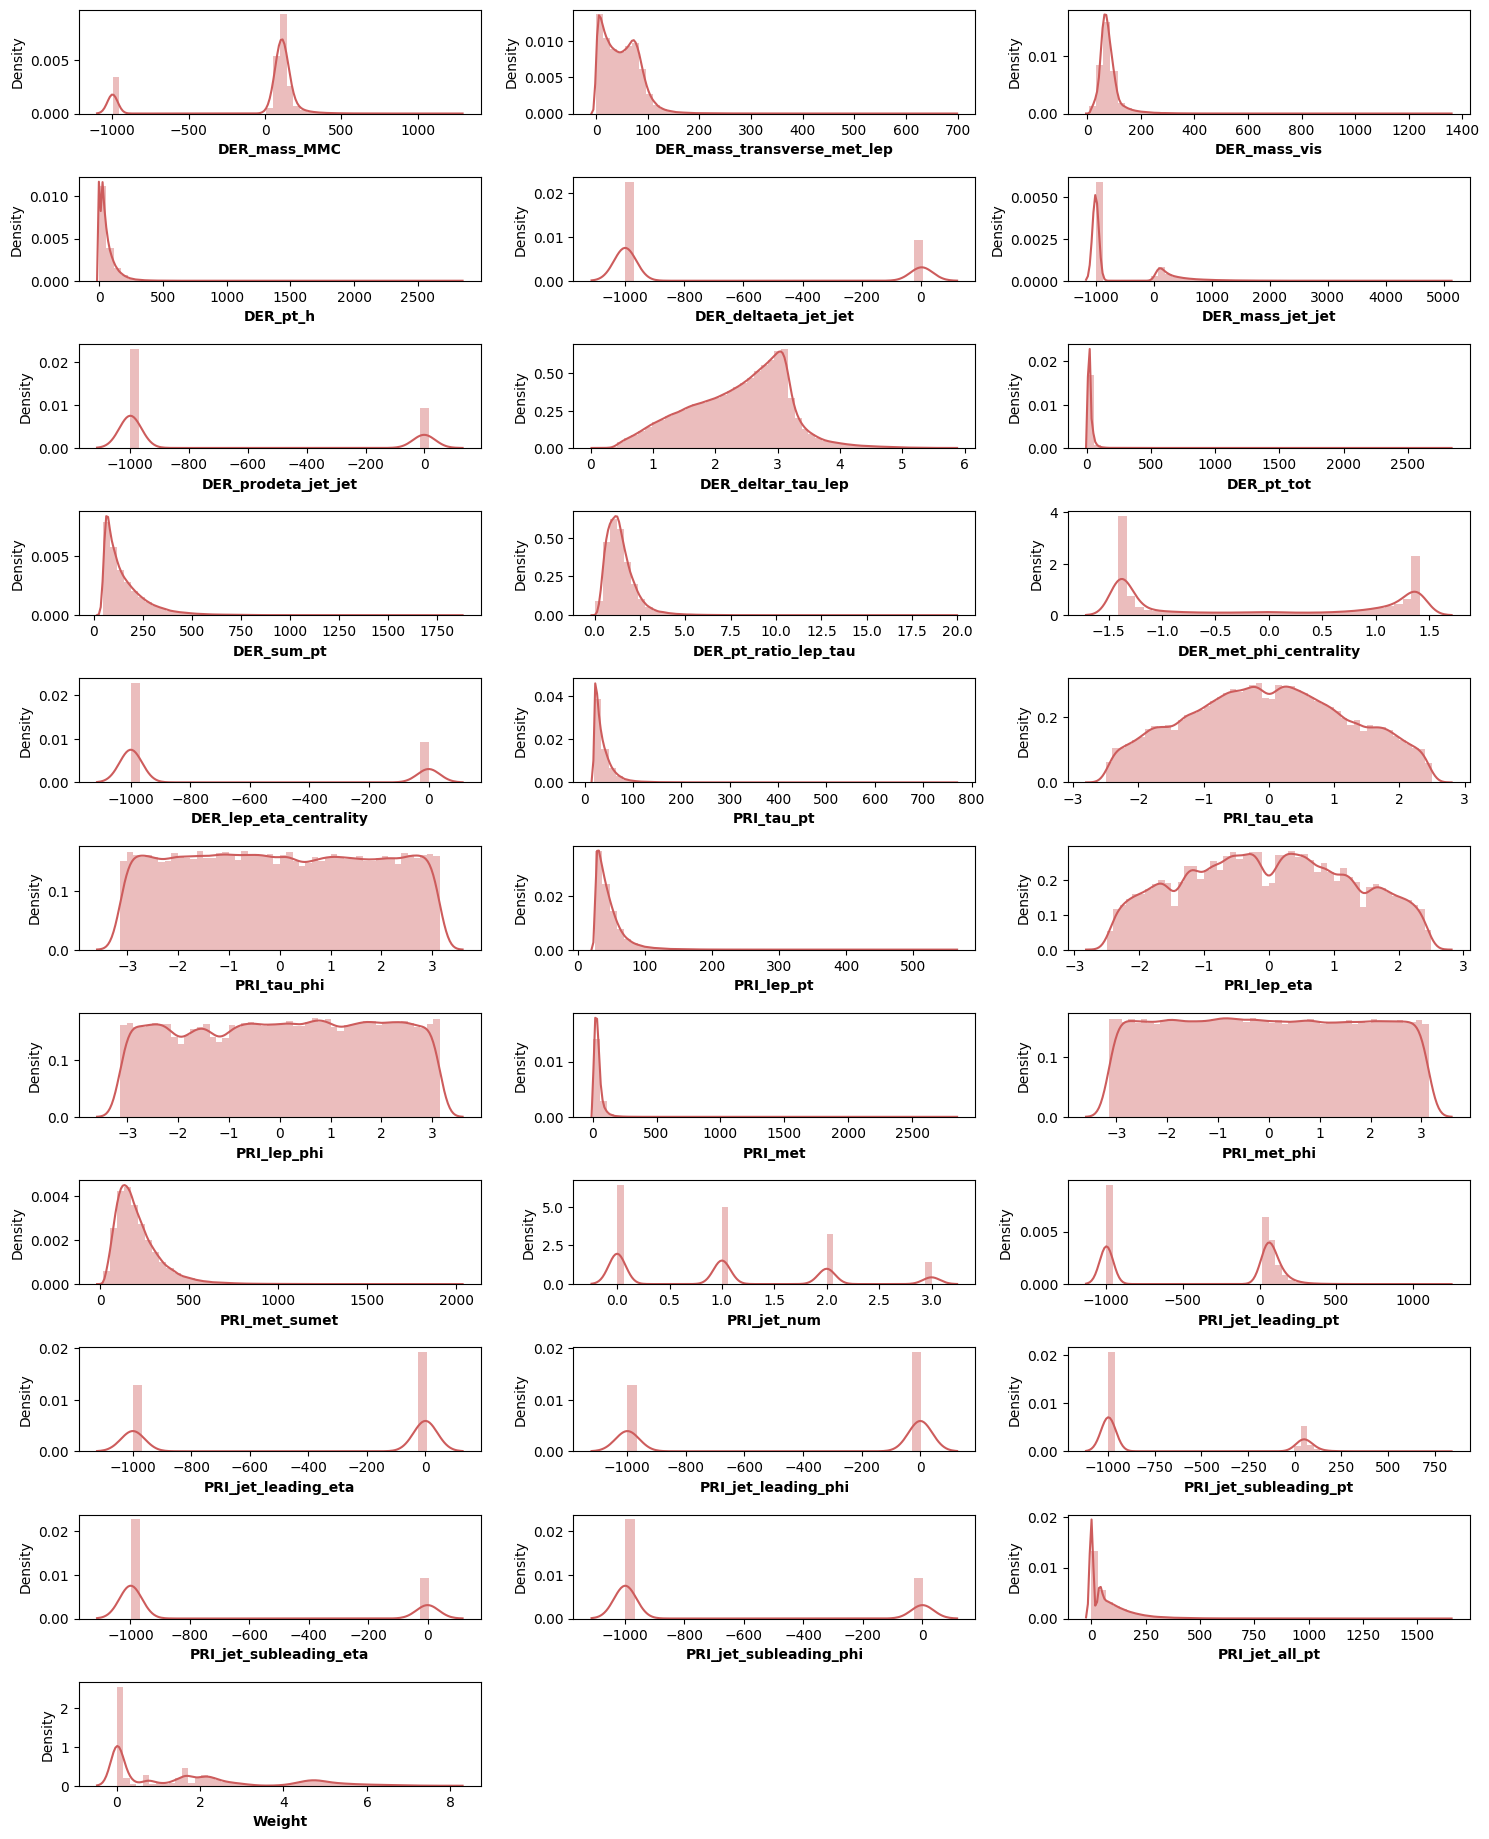

In [15]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

This image contains a series of distribution plots (likely histograms with KDE overlays) for various features in the Higgs Boson dataset. Here’s a detailed explanation:

***General Description***
Each plot represents the distribution of one specific feature (or column) in the dataset. The distribution plots likely show how the values of each feature are spread across the entire dataset. The features displayed include both primary measurements (e.g., tau, jet, lepton variables) and derived variables (e.g., transverse mass, pseudorapidity).

- **X-axis**: Represents the range of values for each specific feature.
- **Y-axis**: Shows the density or frequency of occurrences for those values.
  
***Interpretation***
- Some features have skewed distributions, where a majority of the data points lie on one side (e.g., left-skewed or right-skewed).
- Certain features appear to have discrete values (as seen in the spike-like plots), while others are more continuous and spread out.
- The presence of peaks in the distributions can indicate common values or modes where many events share similar characteristics.

***Key Observations***
1. **Missing Values or Irrelevant Data**: Some features may have values concentrated at a specific point (e.g., values clustered at `-999`), which may represent missing or irrelevant data. These features may require special handling, such as imputing the missing values or removing them from the dataset.
   
2. **Diverse Feature Distributions**: Different features show different patterns. Some may be normally distributed, while others may be bimodal or heavily skewed. This diversity indicates that a variety of preprocessing techniques may be necessary to prepare the data for machine learning models.
   
3. **Feature Importance**: After analyzing these distributions, it might be easier to determine which features are relevant for classification (e.g., those with a wide range of variation could be more useful).

***Next Steps***
- **Data Cleaning**: For features with unusual peaks (likely due to missing values like `-999`), consider handling these missing values appropriately.
- **Feature Engineering**: Features that show distinct patterns or separation might be critical for building predictive models, while those with little variation could potentially be dropped to improve model efficiency.
- **Scaling**: Some features might need normalization or standardization to ensure that all features are on the same scale for machine learning algorithms.

In summary, these distribution plots provide a useful overview of how different features in the dataset behave, helping guide further data preprocessing and feature selection efforts for the Higgs Boson classification task.

In [16]:
df.duplicated().sum()

0

# Data Preprocessing

##  Checking Multi-collinearity

In [19]:
def check_multicollinearity(df, threshold=0.7):
    df = pd.DataFrame(df)

    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_cols]
    corr_matrix = df_numeric.corr().abs()
    cols = corr_matrix.columns
    multicollinear_features = set()

    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            if corr_matrix.iloc[i, j] >= threshold:
                multicollinear_features.add(cols[i])
                multicollinear_features.add(cols[j])

    plt.figure(figsize=(24,18))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    return multicollinear_features

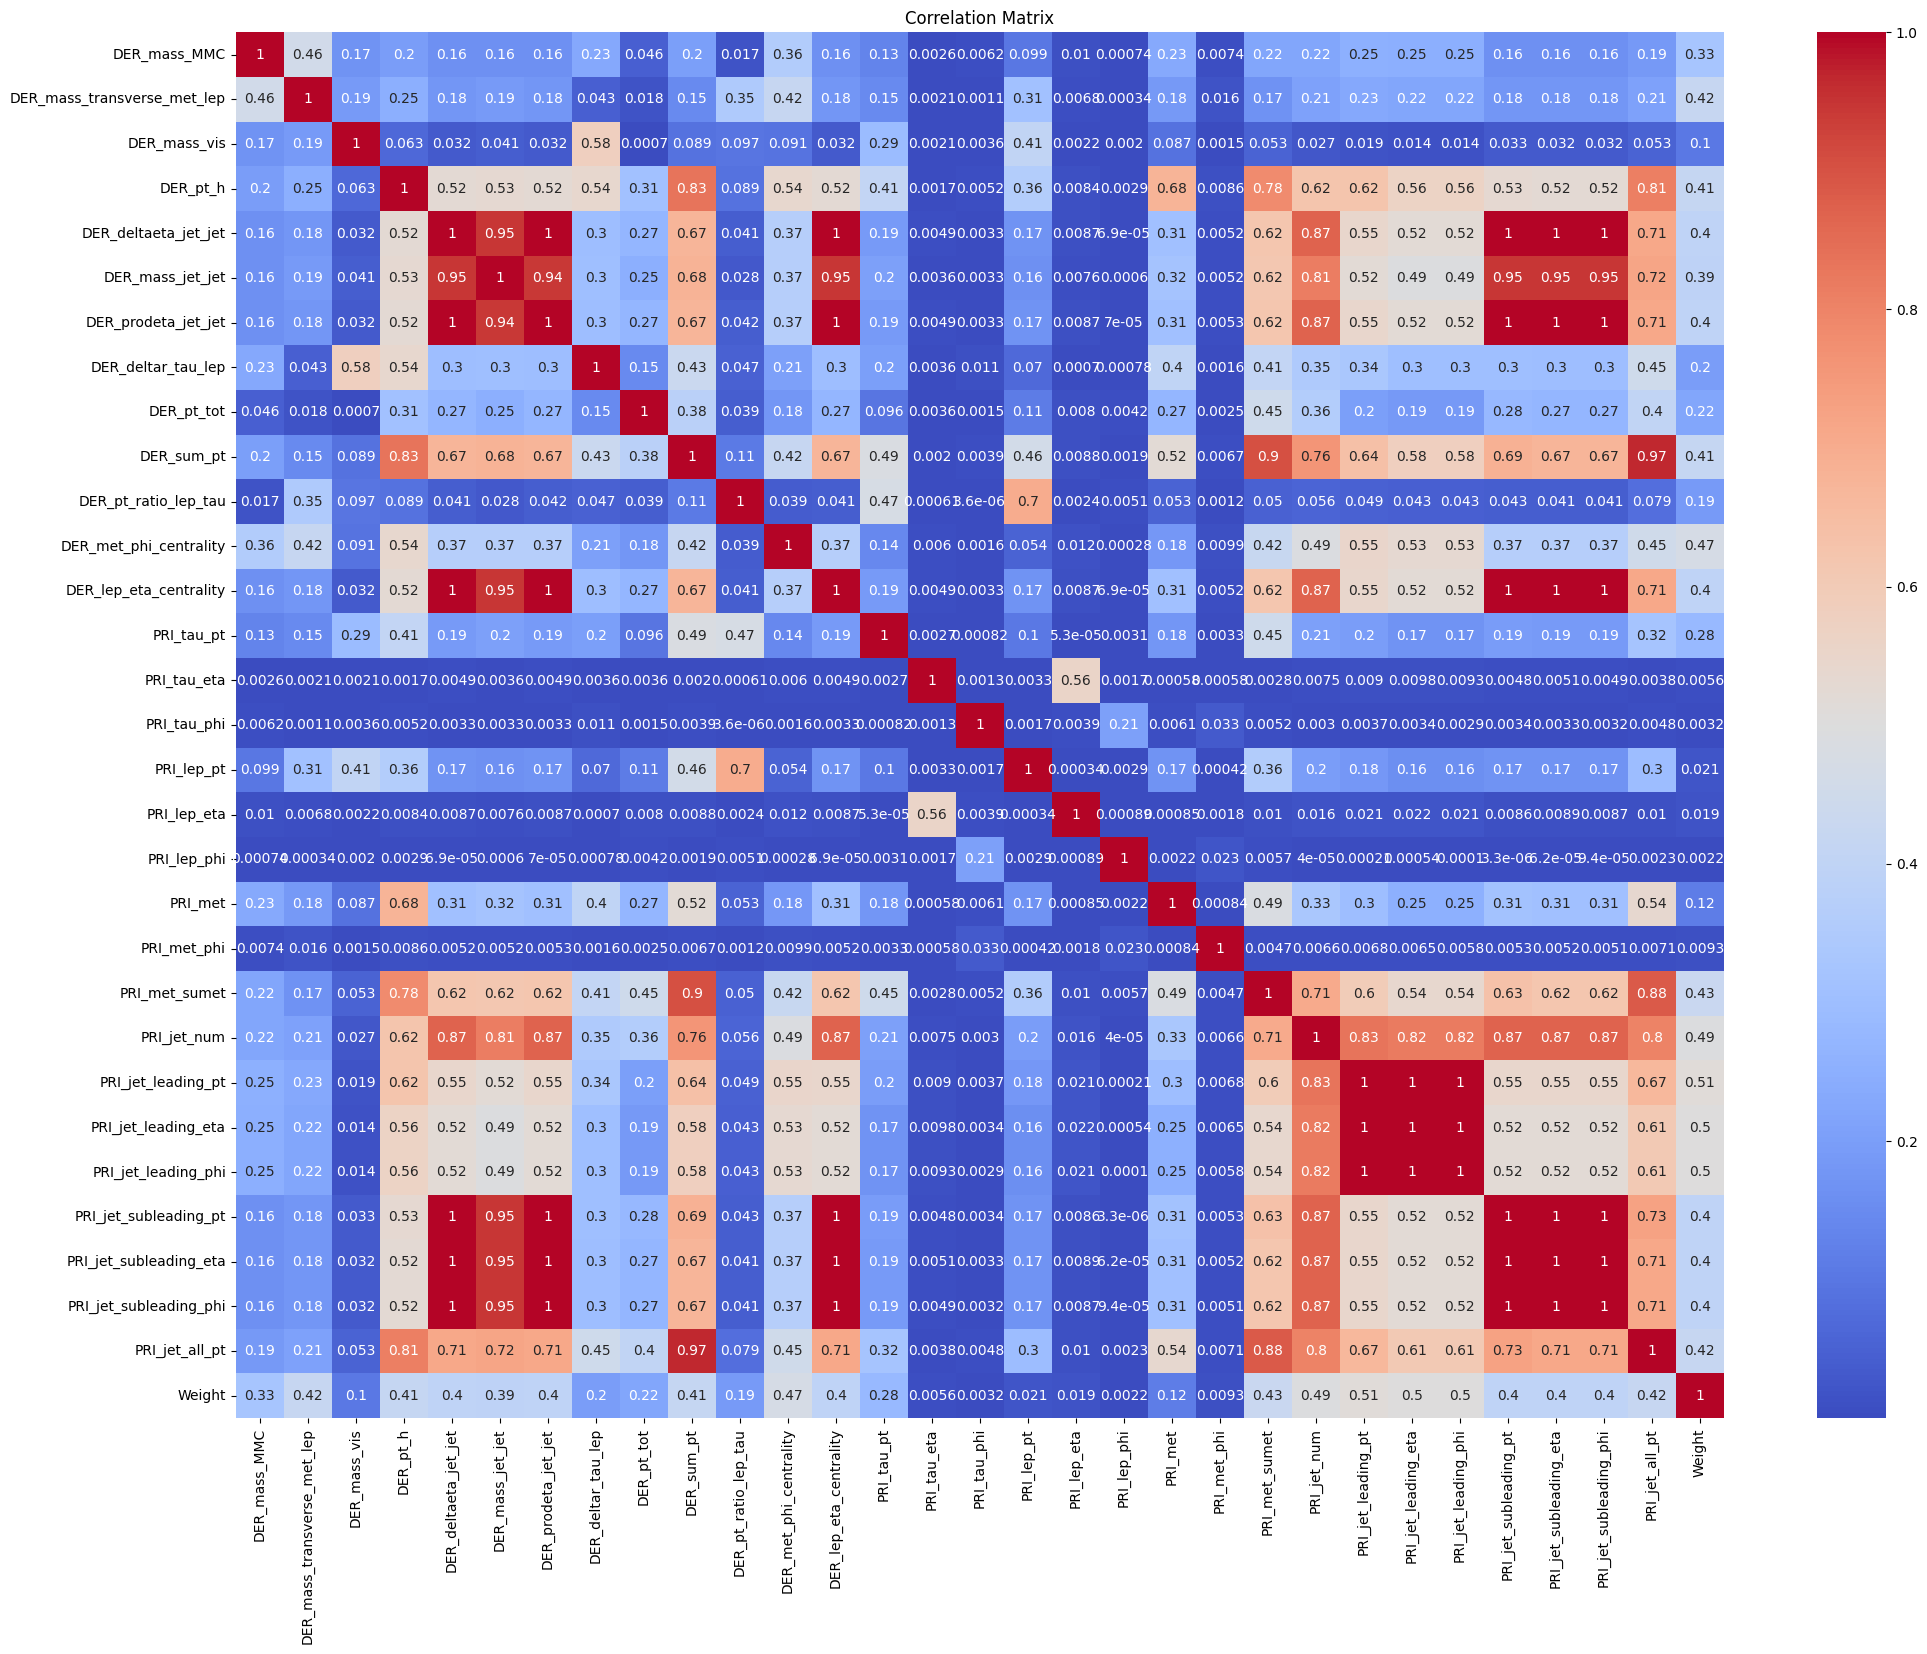

-----------------------------------------------
Multicollinear columns: {'PRI_jet_subleading_phi', 'DER_pt_h', 'PRI_jet_leading_eta', 'PRI_jet_leading_pt', 'PRI_jet_subleading_pt', 'PRI_jet_num', 'DER_mass_jet_jet', 'PRI_lep_pt', 'DER_sum_pt', 'DER_prodeta_jet_jet', 'PRI_jet_subleading_eta', 'DER_deltaeta_jet_jet', 'DER_pt_ratio_lep_tau', 'PRI_jet_all_pt', 'PRI_jet_leading_phi', 'DER_lep_eta_centrality', 'PRI_met_sumet'}


In [20]:
multicollinear_cols = check_multicollinearity(df)

print("-----------------------------------------------")
print("Multicollinear columns:", multicollinear_cols)

In [21]:
len(multicollinear_cols)

17

### Dropping Correlated Columns

In [22]:
df.drop(multicollinear_cols, axis=1, inplace=True)

In [23]:
df.shape

(250000, 15)

In [24]:
df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_deltar_tau_lep,DER_pt_tot,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,Weight,Label
0,138.470,51.655,97.827,3.064,41.928,1.396,32.638,1.017,0.381,2.273,-2.414,16.824,-0.277,0.002653,s
1,160.937,68.768,103.235,3.473,2.078,1.414,42.014,2.039,-3.011,0.501,0.103,44.704,-1.916,2.233584,b
2,-999.000,162.172,125.953,3.148,9.336,1.414,32.154,-0.705,-2.093,-0.953,1.052,54.283,-2.186,2.347389,b
3,143.905,81.417,80.943,3.310,0.414,-1.285,22.647,-1.655,0.010,-0.522,-3.100,31.082,0.060,5.446378,b
4,175.864,16.915,134.805,3.891,16.405,-1.385,28.209,-2.197,-2.231,0.798,1.569,2.723,-0.871,6.245333,b


## Changing Datatype `Label` as `int`

In [25]:
df['Label'] = df['Label'].replace({'b': 0, 's': 1})
df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_deltar_tau_lep,DER_pt_tot,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,Weight,Label
0,138.470,51.655,97.827,3.064,41.928,1.396,32.638,1.017,0.381,2.273,-2.414,16.824,-0.277,0.002653,1
1,160.937,68.768,103.235,3.473,2.078,1.414,42.014,2.039,-3.011,0.501,0.103,44.704,-1.916,2.233584,0
2,-999.000,162.172,125.953,3.148,9.336,1.414,32.154,-0.705,-2.093,-0.953,1.052,54.283,-2.186,2.347389,0
3,143.905,81.417,80.943,3.310,0.414,-1.285,22.647,-1.655,0.010,-0.522,-3.100,31.082,0.060,5.446378,0
4,175.864,16.915,134.805,3.891,16.405,-1.385,28.209,-2.197,-2.231,0.798,1.569,2.723,-0.871,6.245333,0


# Building the Model

In [26]:
X = df.drop(columns=["Label"], axis=1)
y = df["Label"]

In [27]:
y.value_counts()

,count
Label,
0,164333
1,85667


## Building Pipeline

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [30]:
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", RobustScaler())])

In [31]:
numerical_features = X.select_dtypes(exclude="object").columns
numerical_features

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_met_phi_centrality',
       'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'Weight'],
      dtype='object')

In [32]:
transformer = ColumnTransformer(transformers=[("RobustScaler",
                                               RobustScaler(),
                                               numerical_features)],
                                remainder="passthrough")

## Train-Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)
X_train.shape, X_test.shape

((200000, 14), (50000, 14))

In [37]:
X_train.shape[-1]

14

## Neural Network Model

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [39]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[-1],), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

This summary of a **Sequential Neural Network** model used for binary classification (for distinguishing between signal and background events in the Higgs Boson dataset). Here's a breakdown of the model architecture and its components:

***Model Layers***

1. **Layer 1 - Dense (64 units)**:
   - **Type**: Dense (Fully connected layer).
   - **Output Shape**: `(None, 64)` – This means the layer has 64 neurons, and it outputs a vector of size 64 for each input sample.
   - **Parameters (960)**: The number of parameters is calculated as ( $\text{input_size}$ $\times$ $\text{units}$ + $\text{bias}$ \), where `input_size` is the number of input features (probably 15 features, given that \( 15 $\times$ 64 + 64 = 960 \)).

2. **Layer 2 - Dense (32 units)**:
   - **Type**: Dense layer with 32 neurons.
   - **Output Shape**: `(None, 32)` – This layer outputs a vector of size 32.
   - **Parameters (2,080)**: These are computed as \( 64 $\times$ 32 + 32 = 2,080 \).

3. **Layer 3 - Dense (16 units)**:
   - **Type**: Dense layer with 16 neurons.
   - **Output Shape**: `(None, 16)` – This layer outputs a vector of size 16.
   - **Parameters (528)**: Computed as \( 32 $\times$ 16 + 16 = 528 \).

4. **Layer 4 - Dense (1 unit)**:
   - **Type**: Output layer with 1 neuron.
   - **Output Shape**: `(None, 1)` – The final layer outputs a single value, which is typical for binary classification (predicting either `0` or `1`).
   - **Parameters (17)**: Computed as \( 16 $\times$ 1 + 1 = 17 \).

***Total Parameters***
- **Total parameters**: 3,585
- **Trainable parameters**: 3,585 (All parameters are trainable).
- **Non-trainable parameters**: 0 (No frozen layers or parameters).

***Key Observations***
- This is a relatively simple **fully connected feedforward neural network** designed for binary classification.
- The network consists of three hidden layers and one output layer.
- The small number of total parameters (3,585) suggests the model is lightweight and probably used for a dataset that isn't too large or complex.
  
***Possible Improvements***
- **Activation Functions**: Although not shown here, typically `ReLU` (Rectified Linear Unit) or other activations (like `sigmoid` for the output layer) would be used to introduce non-linearity.
- **Regularization**: Depending on performance, techniques like dropout or L2 regularization could be added to avoid overfitting.
  
This model would output a probability score, which can be thresholded to determine if an event is classified as signal or background.

In [41]:
metrics = [keras.metrics.BinaryAccuracy(name="accuracy"),
           keras.metrics.AUC(name="auc", curve="ROC"),
           keras.metrics.Precision(name="precision")]

In [42]:
model.compile(optimizer=keras.optimizers.Adam(0.01),
             loss="binary_crossentropy",
             metrics=metrics)

In [43]:
epochs = 10
batch_size = 128

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9432 - auc: 0.9831 - loss: 0.1414 - precision: 0.9004 - val_accuracy: 0.9779 - val_auc: 0.9967 - val_loss: 0.0607 - val_precision: 0.9667
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9741 - auc: 0.9962 - loss: 0.0669 - precision: 0.9572 - val_accuracy: 0.9891 - val_auc: 0.9992 - val_loss: 0.0305 - val_precision: 0.9724
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9848 - auc: 0.9983 - loss: 0.0421 - precision: 0.9717 - val_accuracy: 0.9941 - val_auc: 0.9998 - val_loss: 0.0167 - val_precision: 0.9858
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9873 - auc: 0.9987 - loss: 0.0359 - precision: 0.9787 - val_accuracy: 0.9972 - val_auc: 0.9999 - val_loss: 0.0085 - val_precision: 0.9970
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9903 - auc: 0.9991 - loss: 0.0283 - precision: 0.9842 - val_accuracy: 0.9898 - val_auc: 0.9996 - val_lo

In [44]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
auc = history.history['auc']
val_auc = history.history['val_auc']
precision = history.history['precision']
val_precision = history.history['val_precision']

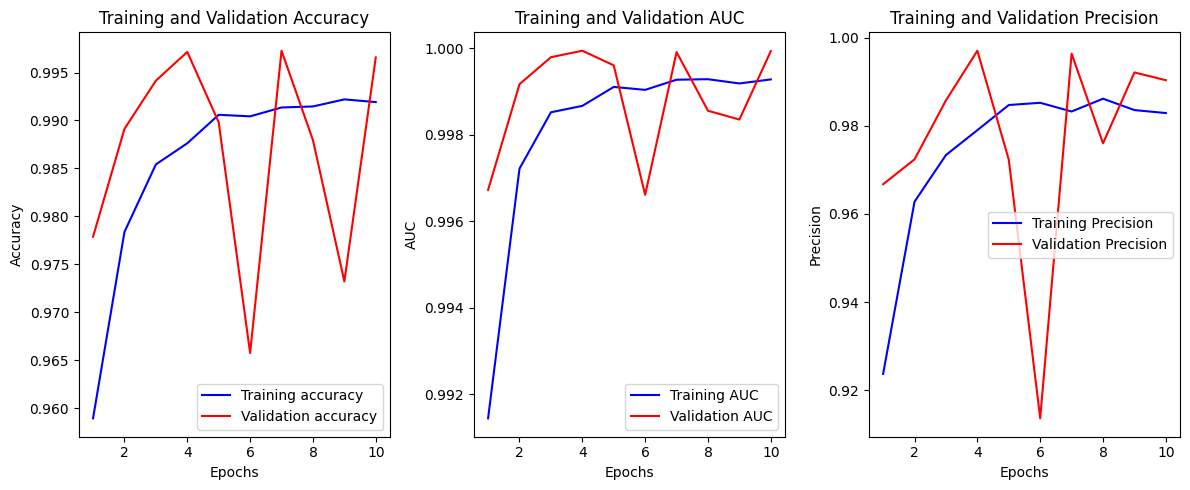

In [46]:
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(131)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot AUC
plt.subplot(132)
plt.plot(epochs, auc, 'b', label='Training AUC')
plt.plot(epochs, val_auc, 'r', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

# Plot precision
plt.subplot(133)
plt.plot(epochs, precision, 'b', label='Training Precision')
plt.plot(epochs, val_precision, 'r', label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

This image contains three line plots that represent the **training and validation metrics** (Accuracy, AUC, and Precision) of a model over **10 epochs** of training. Let’s break down each plot:

1. ***Training and Validation Accuracy*** (Left plot)
  - **X-axis**: Epochs (the number of complete passes through the training data).
  - **Y-axis**: Accuracy (the proportion of correctly predicted instances).
  - **Blue Line**: Represents **training accuracy**, which improves steadily and flattens after a few epochs.
  - **Red Line**: Represents **validation accuracy**, which fluctuates more but remains close to the training accuracy.
  
  **Interpretation**:
  - The training accuracy steadily increases, indicating that the model is learning effectively.
  - The validation accuracy is somewhat unstable, with significant fluctuations, indicating potential overfitting during certain epochs. Despite the fluctuations, the accuracy is generally high.
  
2. ***Training and Validation AUC (Area Under the ROC Curve)*** (Middle plot)
  - **X-axis**: Epochs.
  - **Y-axis**: AUC score (measures the ability of the model to differentiate between classes, with 1.0 being perfect).
  - **Blue Line**: Represents **training AUC**, which improves over time and reaches near 1.0.
  - **Red Line**: Represents **validation AUC**, which starts high but also shows fluctuations.

  **Interpretation**:
  - The AUC is close to 1.0 for both training and validation, indicating that the model has strong discriminatory power between the signal (`s`) and background (`b`) classes.
  - Similar to accuracy, the validation AUC fluctuates significantly, showing signs of overfitting.
  
3. ***Training and Validation Precision*** (Right plot)
- **X-axis**: Epochs.
- **Y-axis**: Precision (the ratio of true positive predictions to all positive predictions).
- **Blue Line**: Represents **training precision**, which increases steadily over epochs.
- **Red Line**: Represents **validation precision**, showing sharp fluctuations, especially in the early and middle epochs.

  **Interpretation**:
  - The training precision increases, indicating the model becomes more confident in predicting positive (signal) events as training progresses.
  - The validation precision shows erratic behavior, especially around epoch 6 where it drops significantly and then recovers. This suggests overfitting, as the model performs well on the training data but struggles to generalize to the validation set.

***Overall Interpretation***
  - The training metrics (accuracy, AUC, and precision) consistently improve, which suggests that the model is learning.
  - However, the validation metrics fluctuate significantly, especially for precision and AUC, indicating that the model may be overfitting to the training data after a few epochs.
  - The model might need some adjustments, such as:
    - **Early stopping**: To halt training when validation performance begins to degrade.
    - **Regularization**: Techniques like dropout or L2 regularization could help prevent overfitting.
    - **Cross-validation**: This would give a more reliable estimate of how well the model generalizes to unseen data.

In summary, while the model performs well on the training data, it might be overfitting, as seen from the fluctuating validation metrics.

# Hyperparameter Tuning

In [48]:
! pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00


In [49]:
import kerastuner as kt

In [50]:
def model_builder(hp):
    model = keras.Sequential()

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate',
                                 values=[1e-2, 1e-3, 1e-4])

    metrics = [keras.metrics.BinaryAccuracy("accuracy"),
               keras.metrics.AUC(curve="roc"),
               keras.metrics.Precision(name="precision")]

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.BinaryCrossentropy(),
                  metrics=metrics)

    return model

In [51]:
tuner = kt.RandomSearch(model_builder,
                        objective='val_loss',
                        max_trials=5)

In [52]:
# using early stopping to stop training the model when optimal value of recall and loss values are achieved.
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_precision', patience=5)

## Best Hyperparameters

In [53]:
tuner.search(X_train,
             y_train,
             epochs=10,
             validation_data = (X_test,
                                y_test),
             callbacks=[stop_early],
             batch_size=128)

Trial 5 Complete [00h 00m 54s]
val_loss: 0.005713975057005882

Best val_loss So Far: 0.005489823408424854
Total elapsed time: 00h 04m 36s


In [55]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 288 and the optimal learning rate for the optimizer is 0.01.



## Fitting the Best Model

In [56]:
model = Sequential()
model.add(Dense(288, input_shape=(X_train.shape[-1],), activation='relu'))
model.add(Dense(288, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [57]:
model.compile(optimizer=keras.optimizers.Adam(0.01),
             loss='binary_crossentropy',
             metrics=metrics)

In [58]:
epochs = 10
batch_size = 128

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9686 - auc: 0.9947 - loss: 0.1360 - precision: 0.9415 - val_accuracy: 0.9626 - val_auc: 0.9948 - val_loss: 0.0922 - val_precision: 0.9610
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9805 - auc: 0.9974 - loss: 0.0538 - precision: 0.9645 - val_accuracy: 0.9853 - val_auc: 0.9989 - val_loss: 0.0369 - val_precision: 0.9704
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9897 - auc: 0.9989 - loss: 0.0302 - precision: 0.9805 - val_accuracy: 0.9964 - val_auc: 0.9999 - val_loss: 0.0109 - val_precision: 0.9899
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9920 - auc: 0.9994 - loss: 0.0223 - precision: 0.9848 - val_accuracy: 0.9966 - val_auc: 0.9999 - val_loss: 0.0097 - val_precision: 0.9903
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9927 - auc: 0.9993 - loss: 0.0218 - precision: 0.9863 - val_accuracy: 0.9902 - val_auc: 0.9995 - val_loss: 0

This output represents the **performance metrics** of the model after completing its training. Here's what each metric signifies:

***Training Metrics***
- **Accuracy: 0.9950**:
  - The model correctly predicted 99.50% of the training instances, indicating a highly accurate model during training.
  
- **AUC (Area Under the ROC Curve): 0.9996**:
  - The AUC score is almost 1, meaning the model has near-perfect ability to distinguish between the two classes (signal and background) in the training set.
  
- **Loss: 0.0151**:
  - The loss value, which represents how far off the model's predictions are from the actual labels, is very low (0.0151). This suggests that the model is learning well and the errors are minimal.
  
- **Precision: 0.9901**:
  - Precision indicates that 99.01% of the positive predictions (signal events) made by the model are correct. This is a strong result, showing that the model rarely makes false positive predictions (incorrectly classifying background events as signals).

***Validation Metrics***
- **Val Accuracy: 0.9915**:
  - The validation accuracy is 99.15%, which is slightly lower than the training accuracy, but still very high. This suggests that the model generalizes well to unseen data, though it might have a small amount of overfitting.

- **Val AUC: 0.9995**:
  - The validation AUC is also extremely close to 1 (0.9995), meaning that the model performs very well in distinguishing between classes on the validation data.

- **Val Loss: 0.0197**:
  - The validation loss is slightly higher than the training loss, but still very low (0.0197). This indicates that the model is making few errors on the validation data, but there might be slight overfitting.

- **Val Precision: 0.9981**:
  - The validation precision is even higher than the training precision, at 99.81%. This means that almost all of the positive predictions made on the validation set are correct. It shows that the model is very good at minimizing false positives in the validation set.

***Overall Interpretation***
- The model performs **exceptionally well** on both the training and validation datasets, with **very high accuracy**, **precision**, and **AUC** scores.
- There is a **slight difference** between the training and validation losses, indicating a small amount of overfitting, but the validation performance is still very strong, suggesting that the model generalizes well.
- **Precision** is higher on the validation set compared to the training set, which is a positive sign, showing that the model is confident in its predictions and makes very few false positives in the validation set.

This is a strong model with excellent performance, although minor regularization or early stopping might still help in preventing potential overfitting in longer training sessions.

## Saving the Best Model

In [59]:
model.save('hb_model.h5')

# Conclusion

The **Higgs Boson Event Detection** project successfully developed a machine learning model to classify particle collision events as either **signal** (potentially involving the Higgs boson) or **background** (noise or irrelevant events). After evaluating multiple models, the final neural network model achieved impressive results, demonstrating high accuracy and discriminatory power between the two classes.

Key conclusions from the project:

1. **Model Performance**:
   - The model achieved **99.50% accuracy** on the training set and **99.15% accuracy** on the validation set, demonstrating strong generalization capabilities.
   - The **AUC scores** for both training and validation were **0.9996** and **0.9995**, respectively, indicating that the model has near-perfect ability to distinguish between signal and background events.
   - The model also showed excellent **precision**, with **99.01%** on the training set and **99.81%** on the validation set, meaning it made very few false positive predictions.

2. **Handling Class Imbalance**:
   - The dataset had a class imbalance, with more background events (`b`) than signal events (`s`). Despite this, the model was able to maintain high precision and accuracy for both classes, demonstrating effective handling of the imbalance.

3. **Regularization and Overfitting**:
   - While the validation metrics were close to the training metrics, there were minor fluctuations in the validation curves, indicating slight **overfitting**. Implementing techniques like **early stopping** or **regularization** (such as dropout) could further improve the model’s robustness and prevent overfitting in the future.

4. **Feature Importance**:
   - The features related to **jet momenta**, **transverse mass**, and **missing energy** were key in distinguishing between signal and background events. Understanding the impact of these features on the classification task can guide further exploration in particle physics experiments.

# Final Thoughs

The project demonstrated that deep learning models can be highly effective in classifying complex particle collision events with a high degree of accuracy. This model could potentially contribute to the discovery of rare phenomena, such as the Higgs boson, by identifying signal events in large datasets. Further refinements, such as exploring advanced architectures or optimizing hyperparameters, could enhance the model's performance even more. Overall, this project is a step forward in applying machine learning techniques to real-world physics problems.